<a href="https://colab.research.google.com/github/Hofong1966/Machine-Learning-Portfolio/blob/main/Gaussian_Mixture_Modeling_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries and data

In [27]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/4. Clustering - Gaussian Mixture Model

/content/drive/MyDrive/Data Mining for Business in Python/4. Clustering - Gaussian Mixture Model


In [28]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [29]:
#loading the data
data = pd.read_csv("Country-data.csv")
data.head()
dataset = data.iloc[:, 1:]
dataset.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Clustering

Text(0.5, 0, 'number of components')

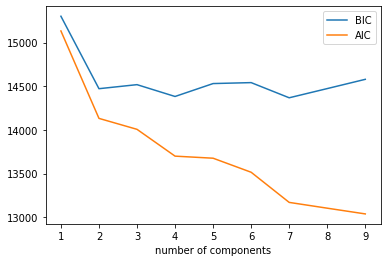

In [49]:
#finding optimal number of cluster
n_components = np.arange(1,10)
models = [GaussianMixture(n,random_state=100).fit(dataset) 
         for n in n_components]
plt.plot(n_components,
         [m.bic(dataset) for m in models],
         label='BIC')
plt.plot(n_components,
         [m.aic(dataset) for m in models],
         label='AIC')
plt.legend()
plt.xlabel('number of components')

In [50]:
#GMM
model = GaussianMixture(n_components = 4,
                        random_state = 100).fit(dataset)

#Interpretation

In [57]:
#predicting cluster by country
cluster = pd.Series(model.predict(dataset))
cluster[:3]

0    1
1    2
2    2
dtype: int64

In [58]:
#assign a cluster in the dataframe
data['Cluster']=cluster
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,...,2,3,0,1,2,3,0,1,2,3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,...,0.00,0.0,0.0,1.00,0.00,0.0,0.0,1.00,0.00,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,...,0.04,0.0,0.0,0.96,0.04,0.0,0.0,0.40,0.60,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,...,0.02,0.0,0.0,0.98,0.02,0.0,0.0,0.04,0.96,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,...,0.00,0.0,0.0,1.00,0.00,0.0,0.0,1.00,0.00,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,...,1.00,0.0,0.0,0.00,1.00,0.0,0.0,0.00,1.00,0.0


In [59]:
#searching a specific country
data.loc[data['country']=='Portugal']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,...,2,3,0,1,2,3,0,1,2,3
122,Portugal,3.9,29.9,11.0,37.4,27200,0.643,79.8,1.39,22500,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [62]:
#Create the probabilities of belonging to any cluster
probabilities = round(pd.DataFrame(model.predict_proba(dataset)))
probabilities.head(2)

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0


In [63]:
#joinning probabilities with data
data = pd.concat([data,probabilities], axis=1)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,...,2,3,0,1,2,3,0,1,2,3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,...,0.00,0.0,0.0,1.00,0.00,0.0,0.0,1.0,0.0,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,...,0.04,0.0,0.0,0.40,0.60,0.0,0.0,0.0,1.0,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,...,0.02,0.0,0.0,0.04,0.96,0.0,0.0,0.0,1.0,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,...,0.00,0.0,0.0,1.00,0.00,0.0,0.0,1.0,0.0,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,...,1.00,0.0,0.0,0.00,1.00,0.0,0.0,0.0,1.0,0.0


In [64]:
# interpreting the cluster
interpretation = pd.DataFrame(model.means_,
                              columns = list(dataset.columns))
interpretation

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,4.802058,50.772354,9.231791,45.283885,42855.241595,2.393281,80.466375,1.758558,41003.676208
1,64.543603,31.797092,6.267282,45.334637,4819.445791,9.928150,64.229090,3.932374,2205.621353
2,16.350858,47.815558,6.373401,49.280777,18275.354668,7.459794,74.672355,2.079729,10301.751934
3,5.000000,92.333333,6.353333,64.766667,93000.000000,5.516667,80.600000,1.883333,87700.000000
